In [331]:

#Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error   
import pickle
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [332]:
df = pd.read_csv('/Users/damac44/Desktop/diamonds/diamonds.csv')


In [333]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [334]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [335]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [336]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [337]:
descrip = df.describe(include='object')
print(descrip)


          cut  color clarity
count   53940  53940   53940
unique      5      7       8
top     Ideal      G     SI1
freq    21551  11292   13065


In [338]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [339]:
df.price.describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [340]:
#checking the null values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Unnamed: 0,0,0.0
carat,0,0.0
cut,0,0.0
color,0,0.0
clarity,0,0.0
depth,0,0.0
table,0,0.0
price,0,0.0
x,0,0.0
y,0,0.0


In [341]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [342]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['cut']= label_encoder.fit_transform(df['cut'])
df['color']= label_encoder.fit_transform(df['color'])
df['clarity']= label_encoder.fit_transform(df['clarity'])

In [343]:
df.duplicated().sum()

0

In [344]:
df[['x']]= df[['x']].replace(0,df['x'].mean())


In [345]:
df[['y']]= df[['y']].replace(0,df['y'].mean())

In [346]:
df[['z']]= df[['z']].replace(0,df['z'].mean())

In [347]:
print("Number of rows with x == 0: {} ".format((df.x==0).sum()))
print("Number of rows with y == 0: {} ".format((df.y==0).sum()))
print("Number of rows with z == 0: {} ".format((df.z==0).sum()))
print("Number of rows with depth == 0: {} ".format((df.depth==0).sum()))

Number of rows with x == 0: 0 
Number of rows with y == 0: 0 
Number of rows with z == 0: 0 
Number of rows with depth == 0: 0 


In [348]:
df["Volume"] = df["x"] * df["y"] * df["z"]
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,Volume
0,1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50,115.920000
53936,53937,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61,118.110175
53937,53938,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56,114.449728
53938,53939,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74,140.766120


In [349]:
df = df.drop(["Unnamed: 0","x","y","z"],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price,Volume
0,0.23,2,1,3,61.5,55.0,326,38.202030
1,0.21,3,1,2,59.8,61.0,326,34.505856
2,0.23,1,1,4,56.9,65.0,327,38.076885
3,0.29,3,5,5,62.4,58.0,334,46.724580
4,0.31,1,6,3,63.3,58.0,335,51.917250


<Axes: >

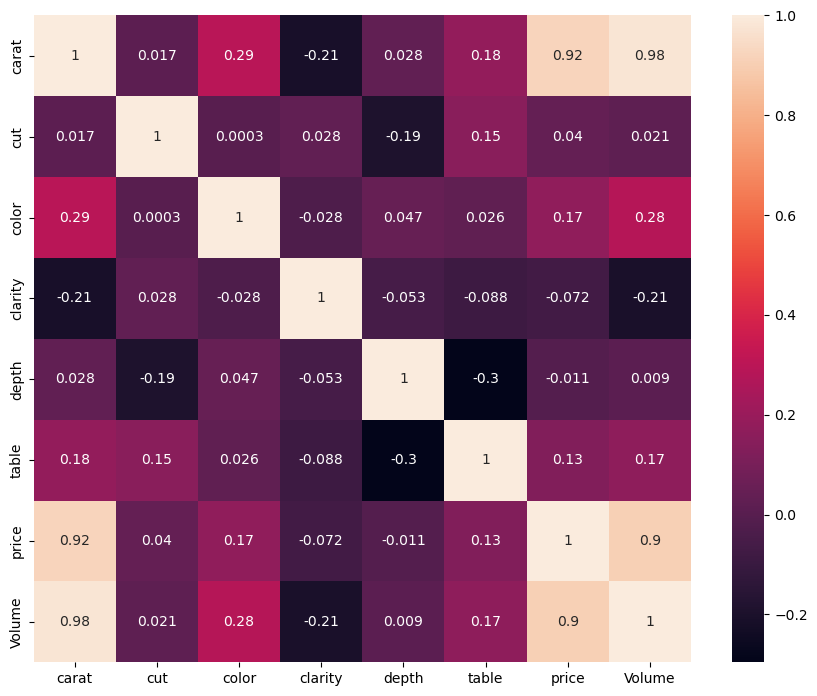

In [350]:
cor = df.corr()

plt.figure(figsize=(10.6, 8.4))  # Width: 10.6 inches, Height: 8.4 inches
sns.heatmap(cor, annot = True)

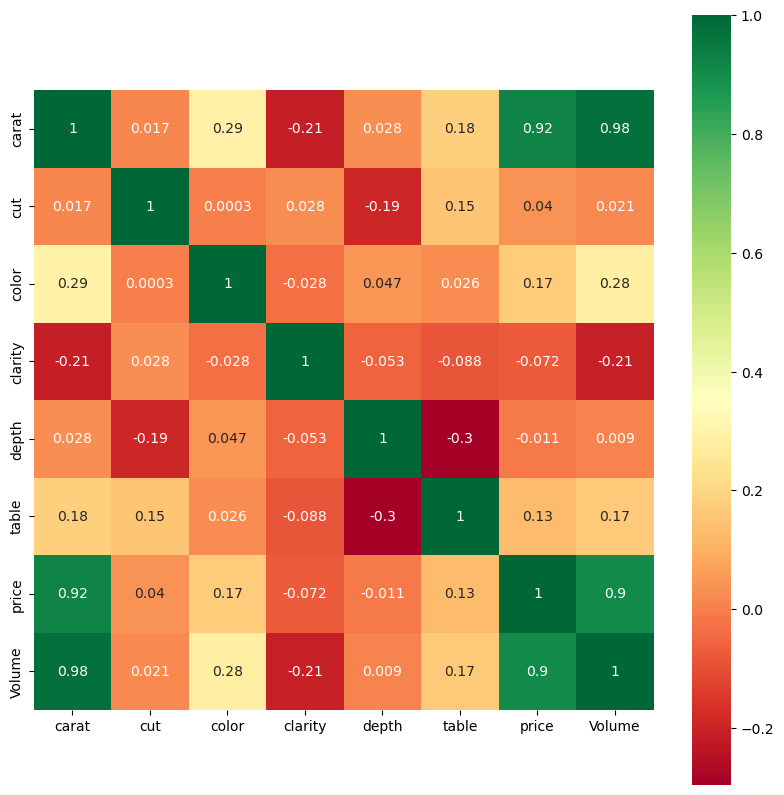

In [351]:
plt.figure(figsize=(10,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

In [352]:
# VARIANCE THRESHOLD
from sklearn.feature_selection import VarianceThreshold

var_thr = VarianceThreshold(threshold = 0.50) #Removing both constant and quasi-constant
var_thr.fit(df)

var_thr.get_support()


array([False,  True,  True,  True,  True,  True,  True,  True])

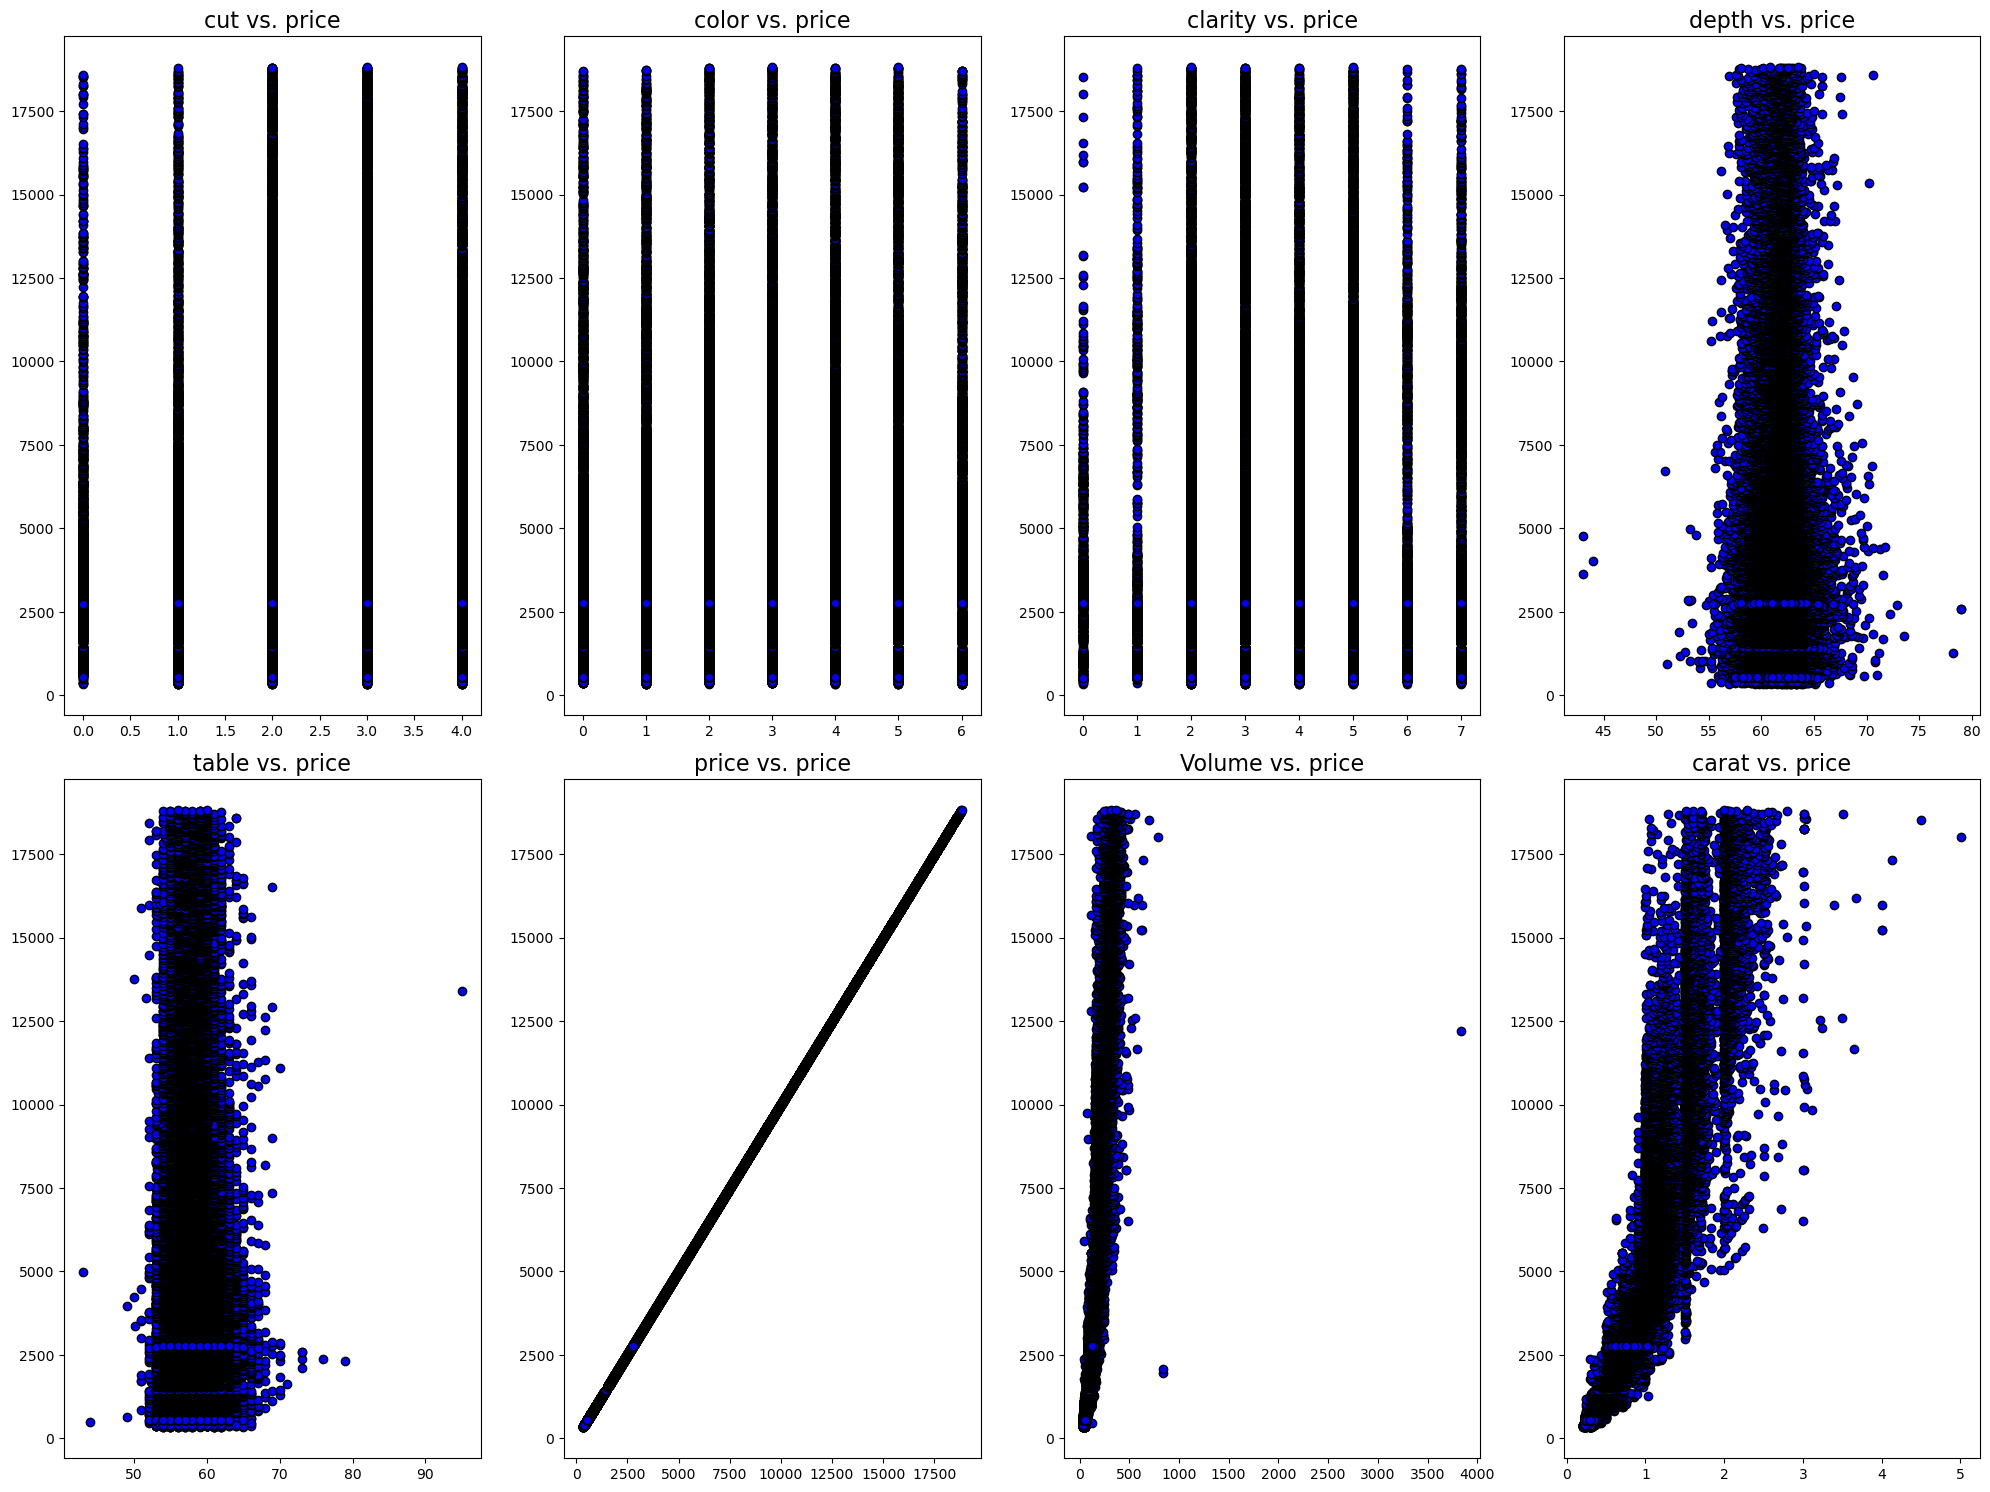

In [353]:
#price is on the y-axis and other features like cut, color,clarity are on the x-axis
fig, axs = plt.subplots(2,4, figsize=(20,15),)
fig.subplots_adjust(hspace = 0.8, wspace=.2)
axs = axs.ravel() 

for index, column in enumerate(df.columns):
    axs[index-1].set_title("{} vs. price".format(column),fontsize=16)
    axs[index-1].scatter(x=df[column],y=df['price'],color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

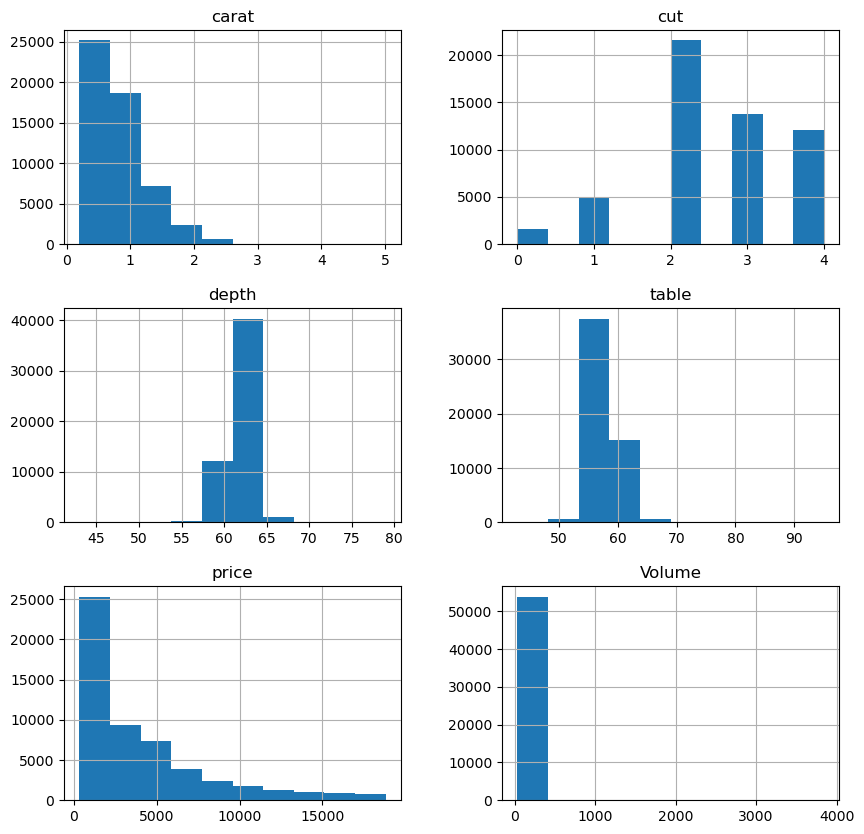

In [354]:
# create a list of all numerical features
features = ['carat','cut','depth','table','price','Volume'] 
df[features].hist(figsize=(10,10));

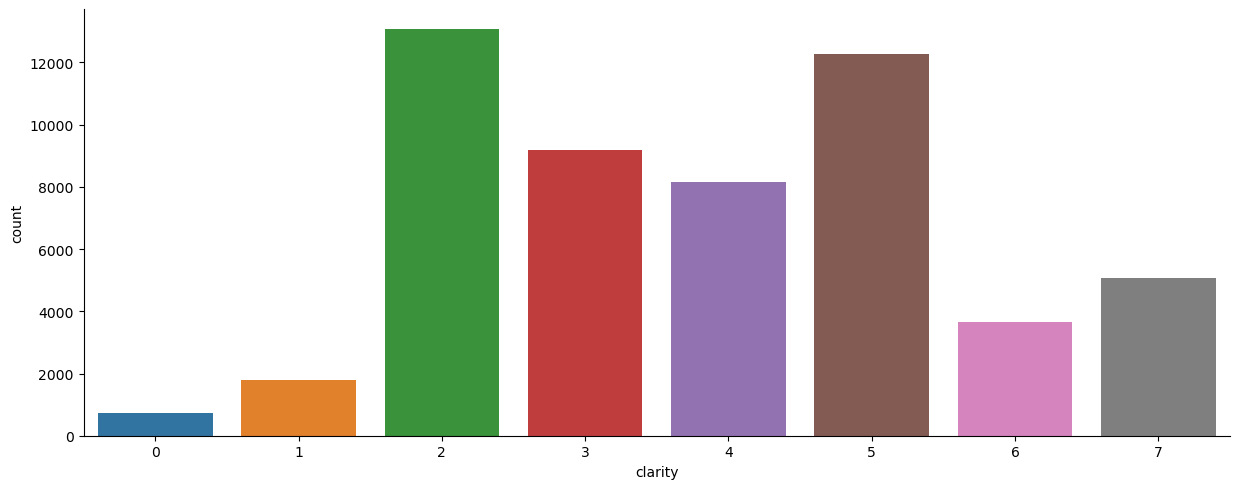

In [355]:
p = sns.catplot(x='clarity', data=df , kind='count',aspect=2.5 )

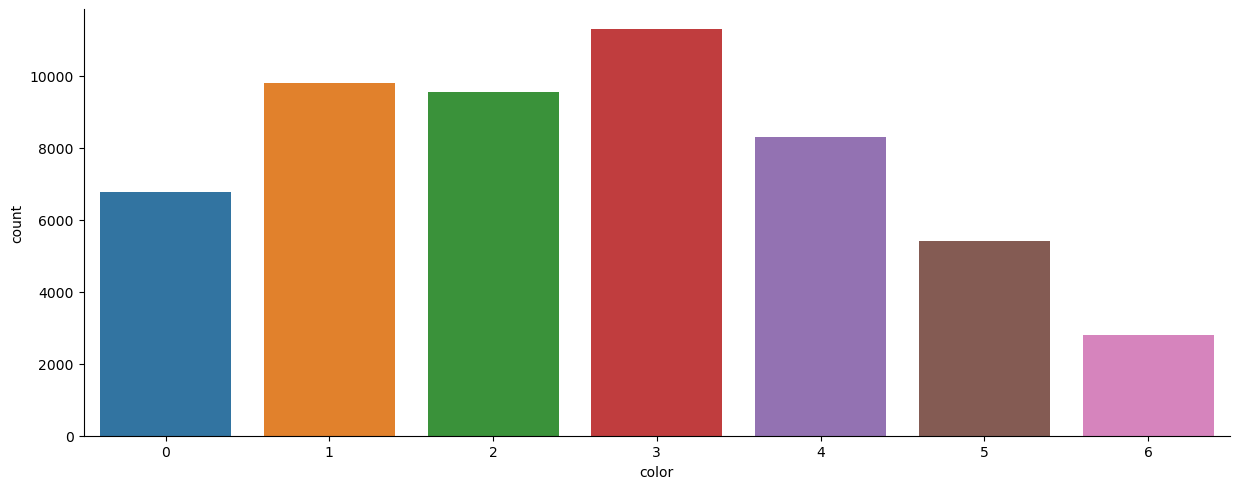

In [356]:
p = sns.catplot(x='color', data=df , kind='count',aspect=2.5 )

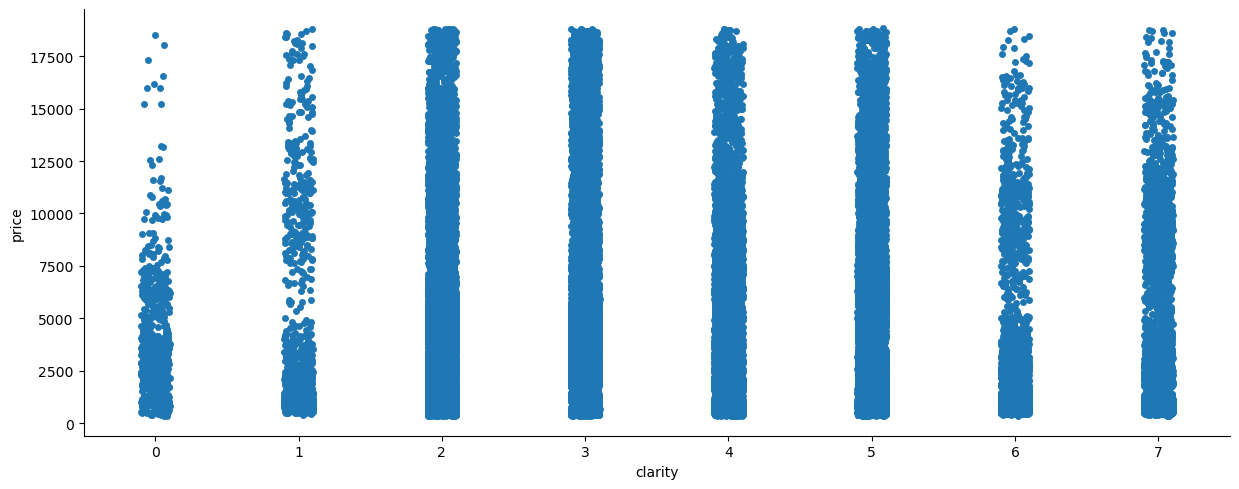

In [357]:
p = sns.catplot(x='clarity',y='price', data=df ,aspect=2.5 )

In [358]:
df['cut'] = df['cut'].replace({'Fair' : 0 , 'Good' : 1 , 'Ideal' : 2 , 'Premium' : 3, 'Very Good' : 4})
df['color'] = df['color'].replace({'D' : 0 , 'E' : 1, 'F' : 2 , 'G' : 3 , 'H' : 4, 'I' : 5 , 'J' : 6})
df['clarity'] = df['clarity'].replace({'I1' : 0 , 'IF' : 1 , 'SI1' : 2 , 'SI2' : 3 , 'VS1' : 4 , 'VS2' : 5 , 'VVS1' : 6 , 'VVS2' : 7})
df

,carat,cut,color,clarity,depth,table,price,Volume
0,0.23,2,1,3,61.5,55.0,326,38.202030
1,0.21,3,1,2,59.8,61.0,326,34.505856
2,0.23,1,1,4,56.9,65.0,327,38.076885
3,0.29,3,5,5,62.4,58.0,334,46.724580
4,0.31,1,6,3,63.3,58.0,335,51.917250
...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,115.920000
53936,0.72,1,0,2,63.1,55.0,2757,118.110175
53937,0.70,4,0,2,62.8,60.0,2757,114.449728
53938,0.86,3,4,3,61.0,58.0,2757,140.766120


In [359]:
df.carat = df['carat'].astype(int)

df.depth = df['depth'].astype(int)

df.table = df['table'].astype(int)

df.volume = df['Volume'].astype(int)

In [360]:
df.skew()

carat      1.145315
cut       -0.187443
color      0.189366
clarity    0.174917
depth     -0.074970
table      0.784018
price      1.618395
Volume     3.041971
dtype: float64

<Axes: ylabel='Density'>

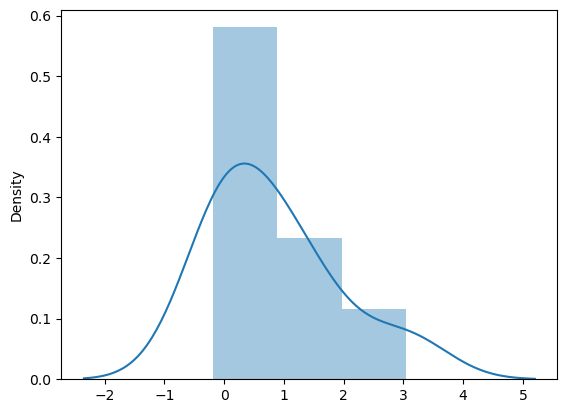

In [361]:
#skew gragh
sk = df.skew()
sns.distplot(sk)

In [362]:
df.kurtosis()

carat       0.573516
cut        -0.465953
color      -0.866762
clarity    -0.820874
depth       5.278578
table       2.780357
price       2.177696
Volume     95.003295
dtype: float64

<Axes: ylabel='Density'>

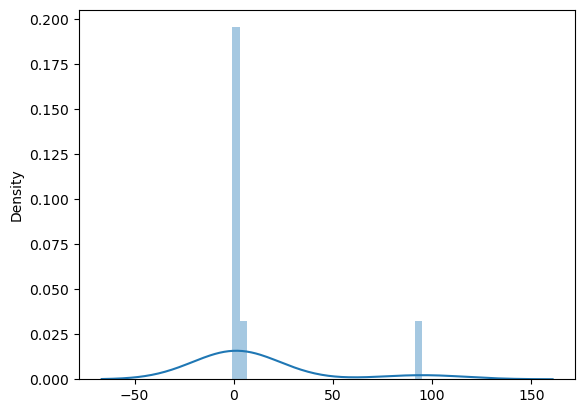

In [363]:
krt = df.kurtosis()
sns.distplot(krt)

<Axes: xlabel='price', ylabel='Density'>

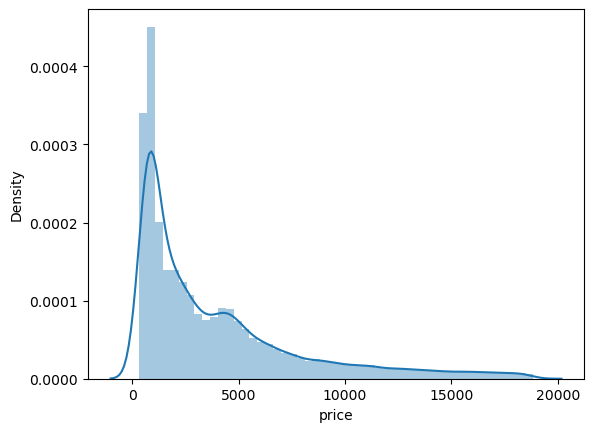

In [364]:
sns.distplot(df['price'])

In [365]:
df['price'] = np.log(df['price'])

<Axes: xlabel='price', ylabel='Density'>

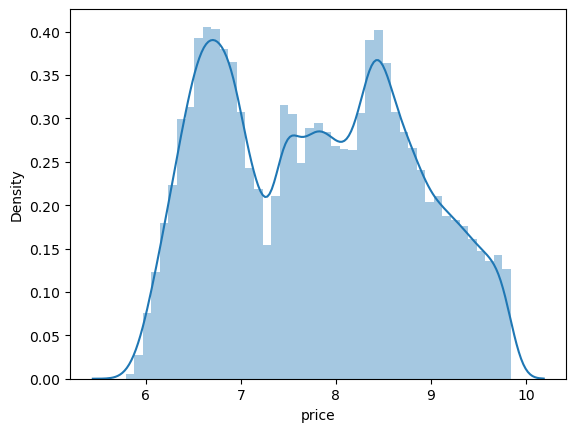

In [366]:
sns.distplot(df['price'])

In [367]:
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming you have your data stored in a pandas DataFrame called 'data'
X = df.drop('price', axis=1)  # Replace 'target_column_name' with the actual target column name
Y = df['price']  # Replace 'target_column_name' with the actual target column name

scale = StandardScaler()

scaledX = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaledX, Y, test_size=0.2, random_state=42)


In [368]:
df = pd.DataFrame(df)

features = ['carat','cut','color','clarity','depth','table','Volume']
target = 'price'
X = df[features]
Y = df[target]


In [369]:
dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(n_estimators=100,random_state=0)
lasso = Lasso(alpha=1.0)
RidgeR = ridge = Ridge(alpha=1.0)
LinearR = lr = LinearRegression()
Adab = adaboost = AdaBoostRegressor()
model1 = LinearRegression()
model2 = DecisionTreeRegressor()
StackingR = stacking_reg = StackingRegressor(estimators=[('rf', rf), ('dt', dt)]) 



listr = [dt, rf, lasso,RidgeR,LinearR,Adab,StackingR]


for i in listr:
    
    i.fit(X_train, y_train)


    test_predictions = i.predict(X_test)


    mse = mean_squared_error(y_test, test_predictions)
    r2 = r2_score(y_test, test_predictions)
    print(f"Testing Mean Squared Error: {mse}")
    print(f"Testing R-squared: {r2}")

    # train Predictions
    train_predictions = i.predict(X_train)

    # Train assessment
    mse = mean_squared_error(y_train, train_predictions)
    r2 = r2_score(y_train, train_predictions)
    print(f"Training Mean Squared Error: {mse}")
    print(f"Training R-squared: {r2}\n")

Testing Mean Squared Error: 0.02166216325458072
Testing R-squared: 0.9789978845352731
Training Mean Squared Error: 0.0013905165225311389
Training R-squared: 0.9986486537208921

Testing Mean Squared Error: 0.01354299505844052
Testing R-squared: 0.9868696610484898
Training Mean Squared Error: 0.0027445078349362002
Training R-squared: 0.9973328037526857

Testing Mean Squared Error: 1.0315514025331651
Testing R-squared: -0.0001199515113599059
Training Mean Squared Error: 1.0289860889313134
Training R-squared: 0.0

Testing Mean Squared Error: 0.14450065240165205
Testing R-squared: 0.859902293653608
Training Mean Squared Error: 0.18209867354969905
Training R-squared: 0.8230309665907889

Testing Mean Squared Error: 0.1444937789133153
Testing R-squared: 0.8599089577062236
Training Mean Squared Error: 0.18209867215482636
Training R-squared: 0.8230309679463687

Testing Mean Squared Error: 0.06501197175727533
Testing R-squared: 0.9369689480506003
Training Mean Squared Error: 0.06397911177363093
T

In [370]:
from sklearn.metrics import mean_squared_error, r2_score

#import the regressors
from sklearn.ensemble import RandomForestRegressor

#create regressor object
random_forest = RandomForestRegressor(n_estimators=100, random_state=0)
# lasso = Lasso(alpha=0.1, random_state=42)

# Model Fitting
random_forest.fit(X_train, y_train)

# Test Predictions
rf_test_y_pred = random_forest.predict(X_test)

# Test assessment
mse = mean_squared_error(y_test, rf_test_y_pred)
r2 = r2_score(y_test, rf_test_y_pred)
print(f"Testing Mean Squared Error: {mse}")
print(f"Testing R-squared: {r2}")

# train Predictions
rf_train_y_pred = random_forest.predict(X_train)

# Train assessment
mse = mean_squared_error(y_train, rf_train_y_pred)
r2 = r2_score(y_train, rf_train_y_pred)
print(f"\n\nTraining Mean Squared Error: {mse}")
print(f"Training R-squared: {r2}")


Testing Mean Squared Error: 0.01354299505844052
Testing R-squared: 0.9868696610484898


Training Mean Squared Error: 0.0027445078349362002
Training R-squared: 0.9973328037526857


In [371]:
print(np.exp(rf_train_y_pred))
print("\n", np.exp(y_train))



[15871.99276643  4520.23002229  5626.5336042  ...   989.69253126
  2765.42007159  6328.22266687]

 26546    16231.0
9159      4540.0
14131     5729.0
15757     6300.0
24632    12968.0
          ...   
11284     4975.0
44732     1617.0
38158     1014.0
860       2871.0
15795     6320.0
Name: price, Length: 43152, dtype: float64


In [379]:
print(np.exp(rf_test_y_pred))
print("\n", np.exp(y_test))

[ 538.79315625 2290.29977798 1141.21281873 ...  755.67066441 9553.88621884
 3631.15761043]

 1388      559.0
50052    2201.0
41645    1238.0
42377    1304.0
17244    6901.0
          ...  
44081    1554.0
23713     633.0
31375     761.0
21772    9836.0
4998     3742.0
Name: price, Length: 10788, dtype: float64


In [373]:
model_save_path = "rf.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(random_forest,file)

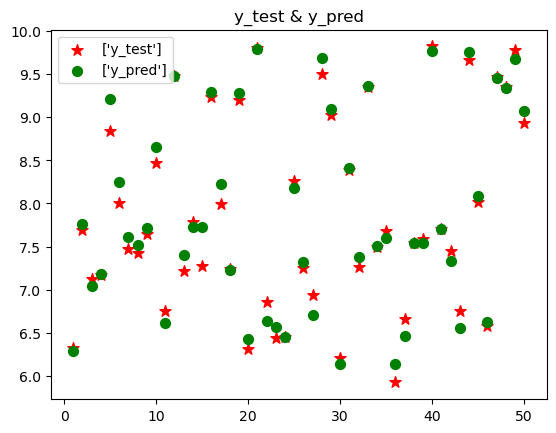

In [378]:
# plot test prediction vs actual Decision Tree
plt.title('y_test & y_pred')
plt.scatter(x=range(1,51),y=y_test[:50],marker='*',c='r',s=70,label=['y_test'])
plt.scatter(x=range(1,51),y=test_predictions[:50],marker='o',c='g',s=50,label=['y_pred'])
plt.legend()

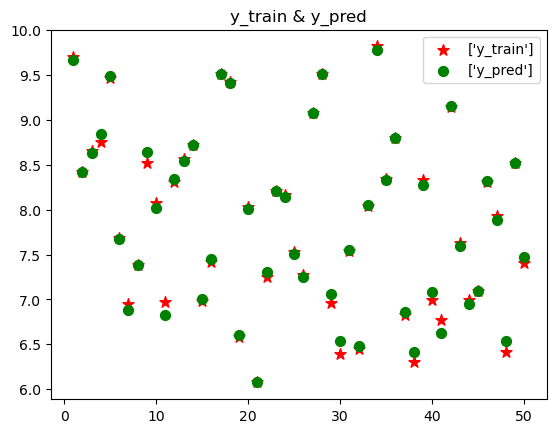

In [375]:
train_predictions
plt.title('y_train & y_pred')
plt.scatter(x=range(1,51),y=y_train[:50],marker='*',c='r',s=70,label=['y_train'])
plt.scatter(x=range(1,51),y=train_predictions[:50],marker='o',c='g',s=50,label=['y_pred'])
plt.legend()